# Data description

Content:
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement:
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

About this file:
This file contains the basic information (ID, age, gender, income, spending score) about the customers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# Overview

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df2 = df
df2.drop_duplicates()
df2.shape

(200, 5)

**There are no duplicates in the data set !**

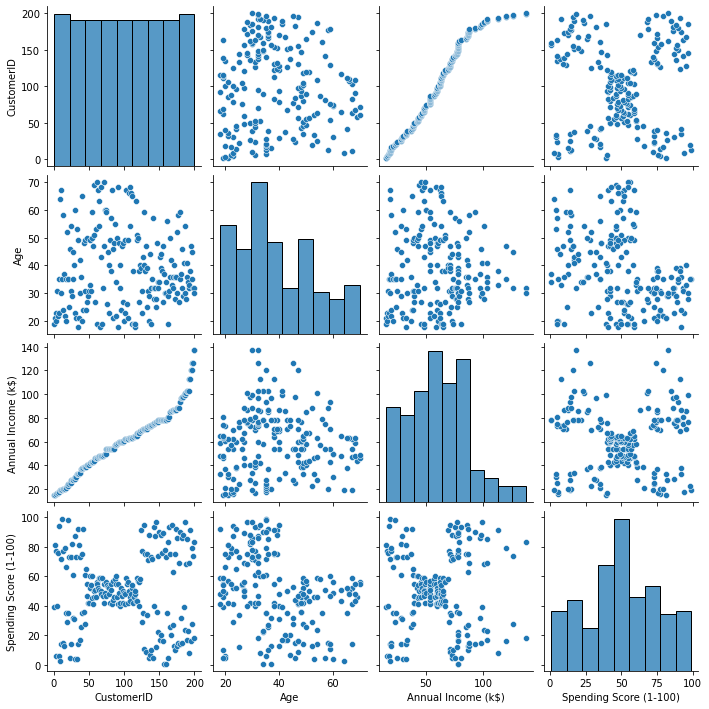

In [9]:
ax = sns.pairplot(df)

### Correlation

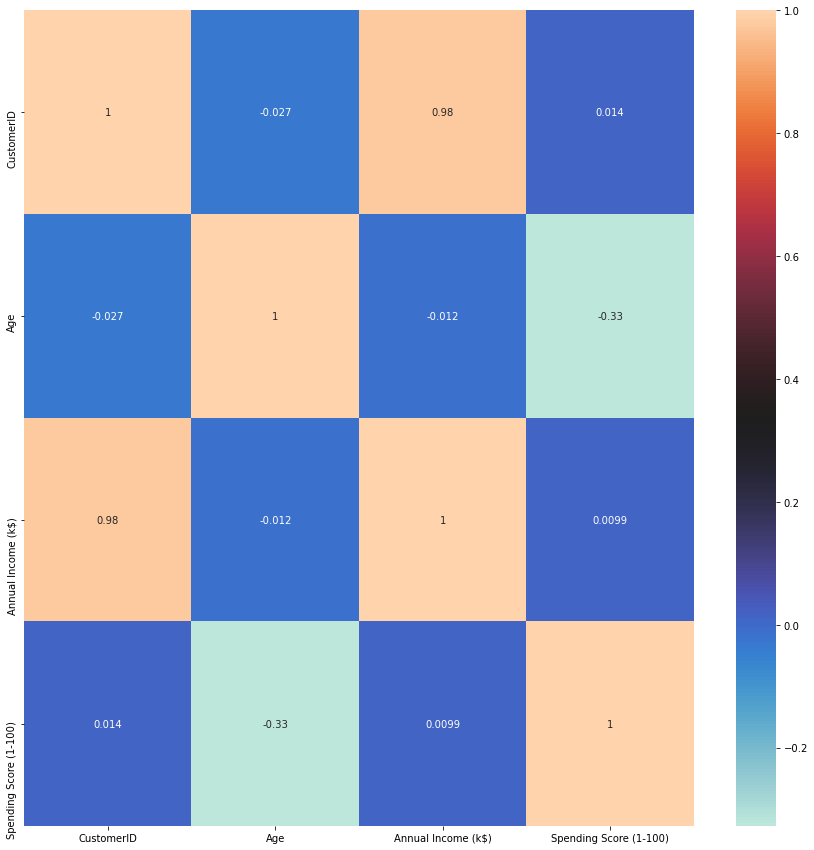

In [10]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot = True, cmap ='icefire')

Text(0.5, 1.0, 'Gender Distribution')

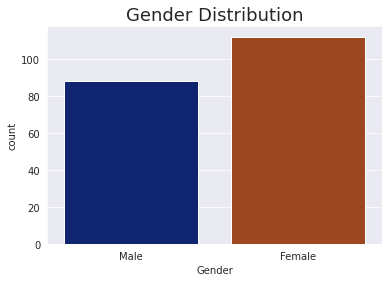

In [11]:
sns.set_style("darkgrid")
sns.set_palette('dark')
ax = sns.countplot(data = df, x = 'Gender')
ax.set_title('Gender Distribution', fontsize=18)

**There are more female costumer in the dataset**

Text(0.5, 1.0, 'Spending Score / Age')

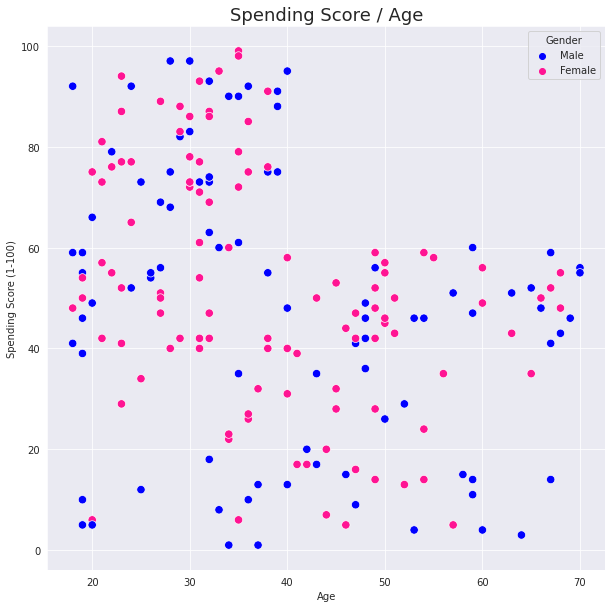

In [12]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', hue='Gender',s = 70, palette=['blue', 'deeppink'])
ax.set_title('Spending Score / Age', fontsize=18)

**So the upper right corner is empty, based on this information, who is older than 40 years that person do not have more 60 spending score !**

Text(0.5, 1.0, 'Spending Score / Age')

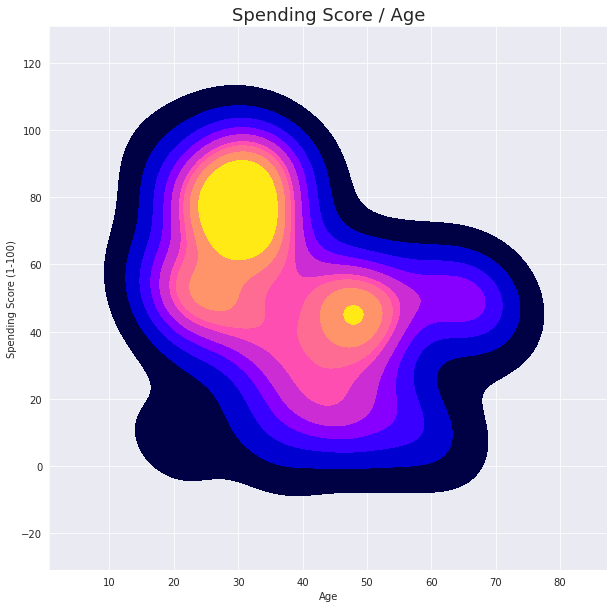

In [13]:
plt.figure(figsize=(10,10))
ax = sns.kdeplot(data = df, x = 'Age', y = 'Spending Score (1-100)', fill = True, cmap='gnuplot2')
ax.set_title('Spending Score / Age', fontsize=18)

**There are 2 hot points based on the distribution. So Around the 30s have the most spending scores**

Text(0.5, 1.0, 'Annual Income / Age')

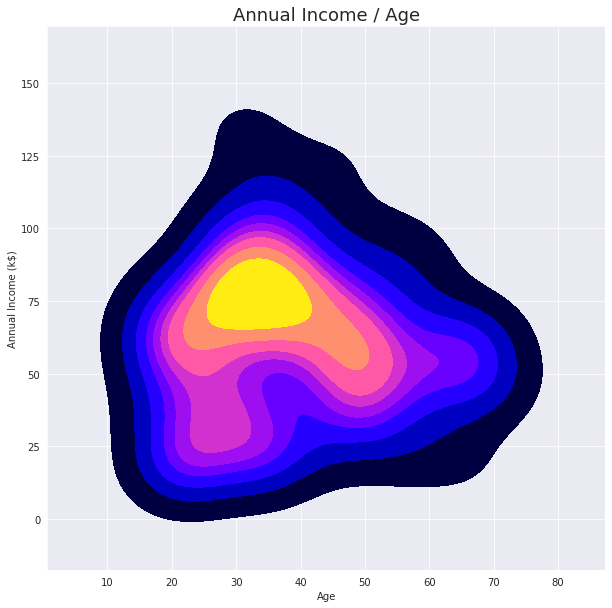

In [14]:
plt.figure(figsize=(10,10))
ax = sns.kdeplot(data = df, x = 'Age', y = 'Annual Income (k$)', fill = True, cmap='gnuplot2')
ax.set_title('Annual Income / Age', fontsize=18)

**The most people's income are between 25 and 40 years.**

Text(0.5, 1.0, 'Annual Income / Spending Score')

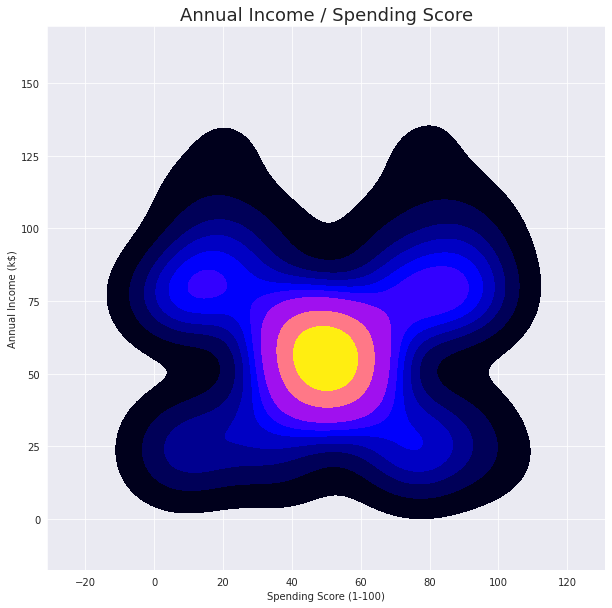

In [15]:
plt.figure(figsize=(10,10))
ax = sns.kdeplot(data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', fill = True, cmap='gnuplot2')
ax.set_title('Annual Income / Spending Score', fontsize=18)

### Encoding the Gender column

In [16]:
#df['Gender']= df['Gender'].map({'Male':1,'Female':0}) # or we can use the LabelEncoder form Sk-learn
#df.head()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

list(le.classes_)

['Female', 'Male']

**Female --> 0 , Male --> 1**

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


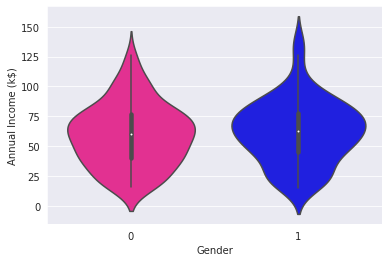

In [19]:
ax = sns.violinplot(data = df, x = 'Gender', y = 'Annual Income (k$)' ,palette=['deeppink', 'blue'])

**So the avarage income more or less are on the same level base on the Gender distribution, however there are more female person how earn money in the data set.**

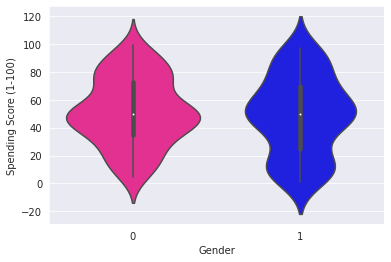

In [20]:
ax = sns.violinplot(data = df, x = 'Gender', y = 'Spending Score (1-100)', palette=['deeppink', 'blue'])

**The avarage spending score is also on the same level, but the female part is more followed by the normal distribution. As you can see the male violinplot has a gap between roughly 20 and 35 years. The male's violint plot upper part is more smoothie**

---

# Clustering

### K Means Clustering - Find the best k number !

In [21]:
from sklearn.cluster import KMeans

In [22]:
X = df.drop(['CustomerID'], axis = 1)

In [23]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [24]:
inertia_list = list()
k_number = list(range(1,11))

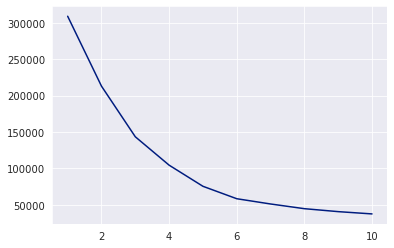

In [25]:
for number in k_number:
    km =KMeans(n_clusters = number)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.plot(k_number, inertia_list)

** Based on the 'Elbow' result, I will choose the 5 cluster solution !**

In [26]:
km = KMeans(n_clusters = 5)

In [27]:
km.fit(X)

KMeans(n_clusters=5)

In [28]:
df['Kmeans clustering'] = km.labels_

### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbs = DBSCAN(eps=11,min_samples=5)

In [31]:
dbs.fit(X)

DBSCAN(eps=11)

In [32]:
df['DBSCAN Clustering'] = dbs.labels_

### Mean Shift

In [33]:
from sklearn.cluster import MeanShift

In [34]:
means = MeanShift(bandwidth = 25)

In [35]:
means.fit(X)

MeanShift(bandwidth=25)

In [36]:
df['Mean Shift Clustering'] = means.labels_

# Final comparing

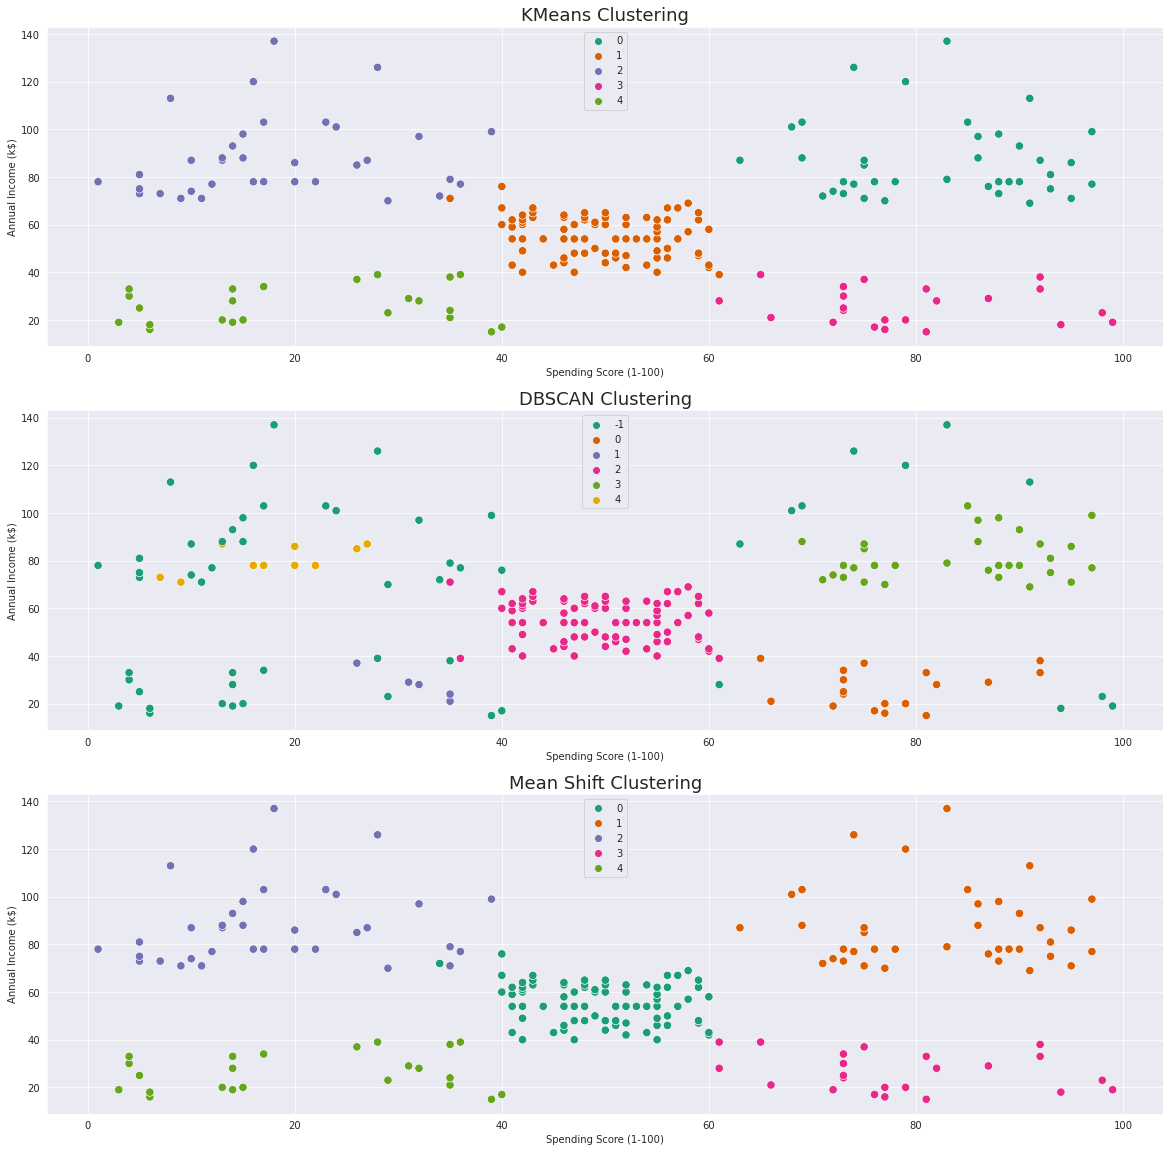

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))
sns.set_palette('dark')

plt.figure(figsize=(10,8))
ax1 = sns.scatterplot( data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'Kmeans clustering', palette='Dark2', ax=axes[0], s = 70)
ax1.set_title('KMeans Clustering', fontsize = 18)
ax1.legend(loc=9)

plt.figure(figsize=(10,8))
ax1 = sns.scatterplot( data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue ='DBSCAN Clustering', palette='Dark2',ax=axes[1], s = 70)
ax1.set_title('DBSCAN Clustering', fontsize = 18)
ax1.legend(loc=9)

plt.figure(figsize=(10,8))
ax1 = sns.scatterplot( data = df, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue ='Mean Shift Clustering', palette='Dark2',ax=axes[2], s = 70)
ax1.set_title('Mean Shift Clustering', fontsize = 18)
ax1.legend(loc=9)

# Conclusion

**Data Preparation: Check the null and Na values.**

**Main Insights:**
 - **There are more female costumer in the dataset**
 - **Who is older than 40 years that person do not have more 60 spending score !**
 - **Around the 30s have the most spending scores**
 - **The most people's income are between 25 and 40 years.**
 - **So the avarage income more or less are on the same level base on the Gender distribution, however there are more female person how earn money in the data set.**
 - **The avarage spending score is also on the same level, but the female part is more followed by the normal distribution. As you can see the male violinplot has a gap between roughly 20 and 35 years. The male's violint plot upper part is more smoothie**
 
 - **There are 5 five groups based on the clustering:**
        - Lower Income and Lower Spending Score
        - Lower Income and Higher Spending Score
        - Golden mean
        - Higher Income and Lower Spending Score
        - Higher Income and Higher Spending Score

**Create Models: I have used 3 differnet models to create clusters to be able to compare them with each others.**

**Final Conclusion: Based on the figures I can recommend the K-Means or Mean Shift algorithm.**

**For the Future: There are some possibilities to fine tune the hyperparameters for DBSCAN. Or implement the 'Hierarchical Agglomerative Clustering'.**